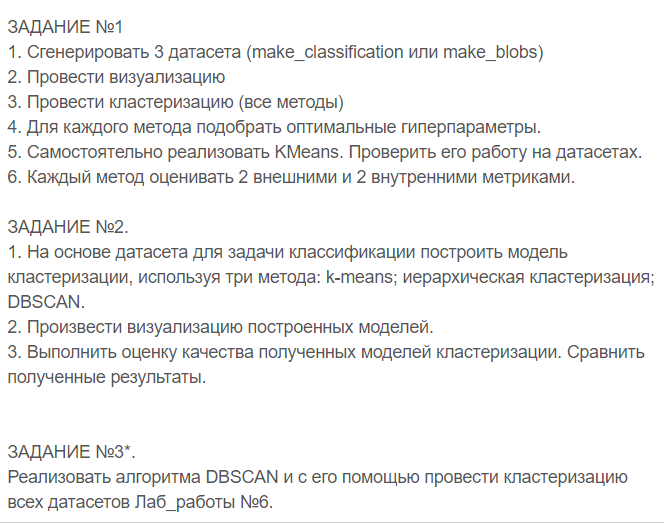

# Задание 1

## Генерация и визуализация данных

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

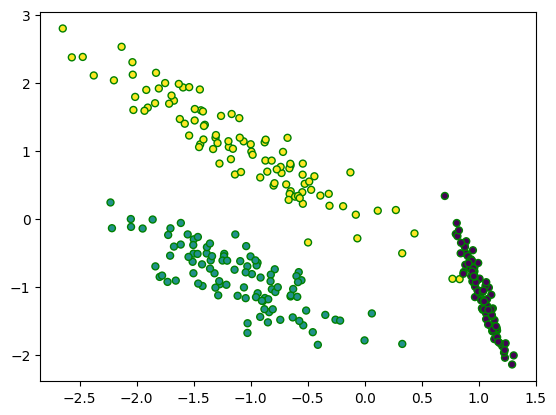

In [60]:
data1, data1_y = make_classification(n_samples=300, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=23, scale=1)

plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="g", c=data1_y)
plt.show()

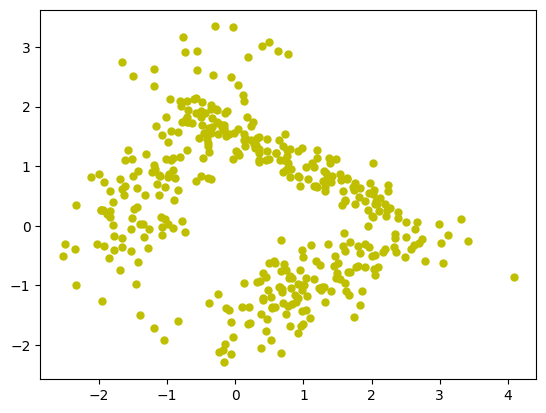

In [3]:
data2, data2_y = make_classification(n_samples=400, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=111)

plt.scatter(data2[:, 0], data2[:, 1], marker="o", s=25, edgecolor="y", c="y")
plt.show()

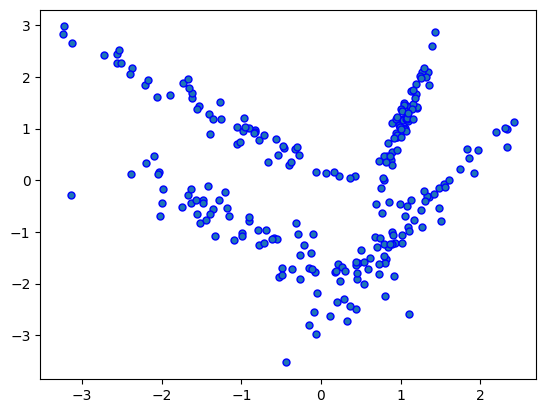

In [4]:
data3, data3_y = make_classification(n_samples=250, n_classes=4, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=188)

plt.scatter(data3[:, 0], data3[:, 1], marker="o", s=25, edgecolor="b")
plt.show()

## Кластеризация

### KMeans

In [5]:
from sklearn.cluster import KMeans

Используем метод локтя для подбора оптимального кол-ва кластеров.

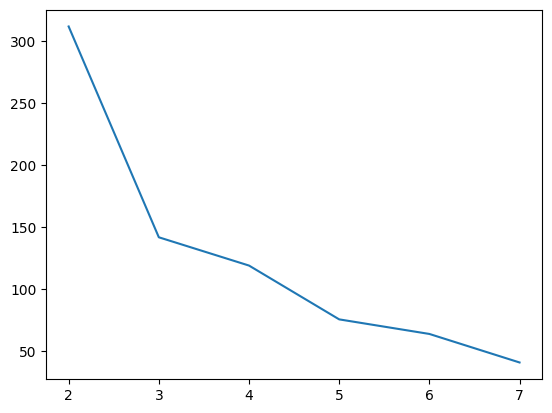

In [6]:
inertias = []

for i in range(2, 8):
    km = KMeans(n_clusters=i, init="k-means++", n_init="auto")
    km.fit(data1)
    inertias.append(km.inertia_)

plt.plot(range(2, 8), inertias)

Самый лютый изгиб для 3-х кластеров. Попробуем силуэт.

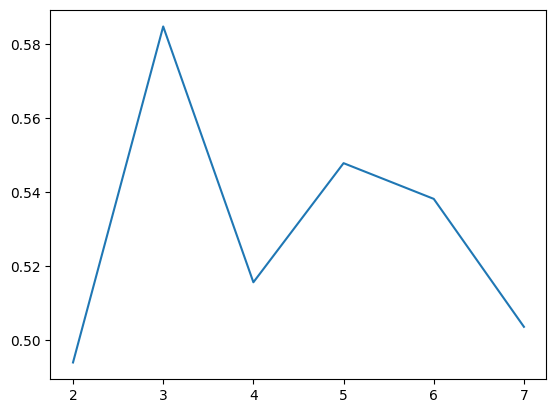

In [7]:
from sklearn.metrics import silhouette_score

silhouettes = []

for i in range(2, 8):
    km = KMeans(n_clusters=i, init="k-means++", n_init="auto").fit(data1)
    silhouettes.append(silhouette_score(data1, km.labels_))

plt.plot(range(2, 8), silhouettes)

Пик силуэта тоже при 3-x кластерах. Используем это!

In [8]:
km = KMeans(n_clusters=3, init="k-means++", n_init="auto")
km.fit(data1)
km.cluster_centers_

array([[-1.08631771, -0.79616835],
       [-1.2364307 ,  1.19231582],
       [ 0.96379606, -1.05656314]])

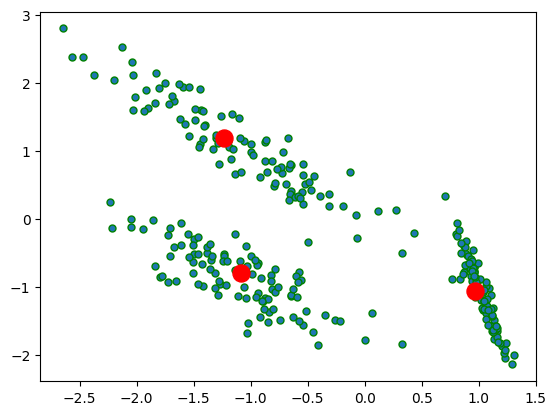

In [9]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="g")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, c="r")

inertia - сумма квадратов расстояний наблюдений до ближайших центроидов.

Силуэт - $\frac{b-a}{max(a, b)}$, где а - среднее расстояние от точки до точек внутри её кластера, b - среднее расстояние от точки до точек из других кластеров.

Силуэт считается для каждой точки и усредняется 

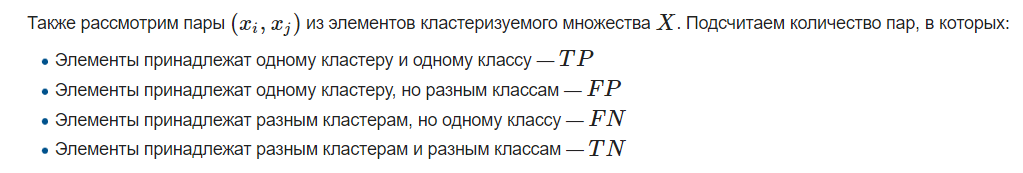

rand_score = $\frac{TP+FN}{TP+FP+TN+FN}$

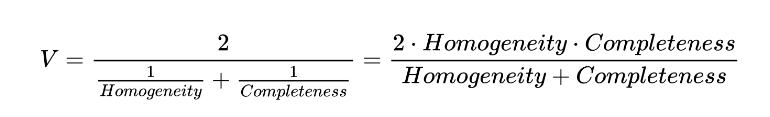

homogeneity показывает, какая доля объектов внутри кластера относится к одному классу

completeness показывает, какая доля объектов класса относится к одному кластеру

In [10]:
from sklearn.metrics import rand_score,  v_measure_score

print("Внутренние метрики")
print(km.inertia_)
print(silhouette_score(data1, km.labels_))

print()

print("Внешние метрики")
print(rand_score(data1_y, km.labels_))
print(v_measure_score(data1_y, km.labels_))

Внутренние метрики
141.99051704994542
0.5846939306935148

Внешние метрики
0.9317502787068005
0.8037612281033373


Алгоритм KMeans справился хорошо, но и набор данных идеально подходит для кластеризации.

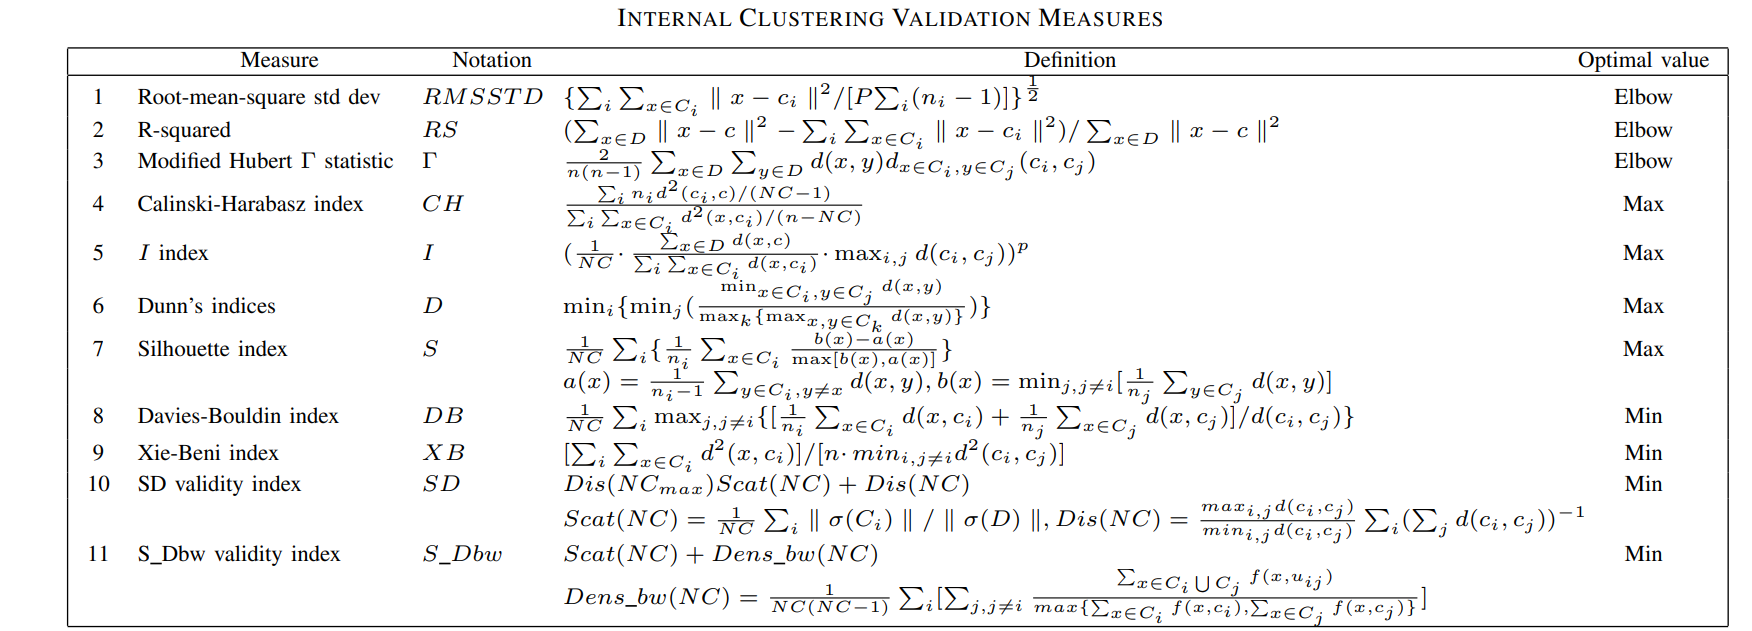

### Affinity Propagation

Применим ко второму датасету (3 класса и 3 кластера)

In [11]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AffinityPropagation

param_grid = {
    "preference": np.arange(-60, -20, 5)  # самонепохожесть. То, насколько сильно точка не хочет быть лидером
}

gs = GridSearchCV(AffinityPropagation(), param_grid, scoring="rand_score").fit(data2, data2_y)
best_params = gs.best_params_
best_params

c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\sklearn\

{'preference': -45}

damping - типа как сглаживание. Значения в матрицах схожести, ответственности и доступности обновляются потихоньку. Когда увеличил этот параметр, алгоритм перестал иногда улетать в очень подробное разбиение. Примерно такое:

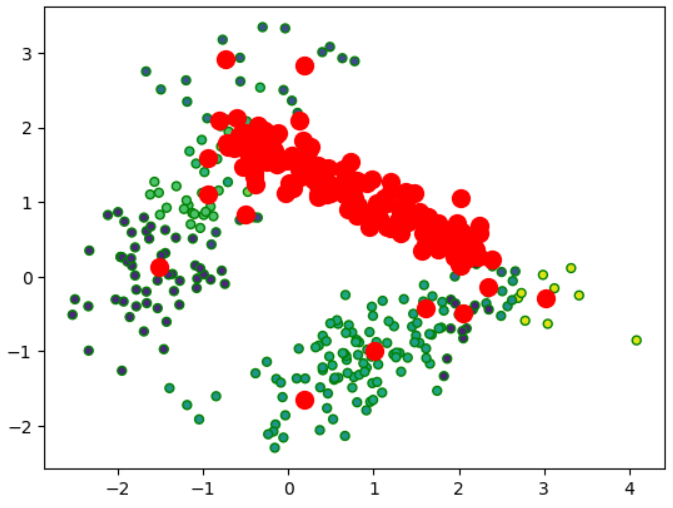

array([[-1.50969585,  0.12372846],
       [ 1.02999761,  0.98275975],
       [ 0.68316277, -1.11590315],
       [ 2.35029588, -0.14083249],
       [-0.34511358,  1.8055556 ]])

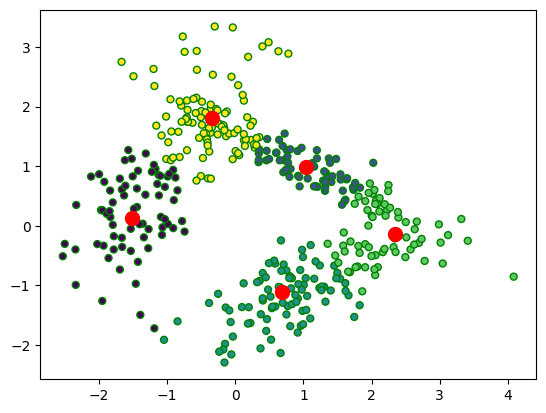

In [12]:
ap = AffinityPropagation(**best_params, damping=0.9).fit(data2)
plt.scatter(data2[:, 0], data2[:, 1], marker="o", s=25, edgecolor="g", c=ap.labels_)
plt.scatter(ap.cluster_centers_[:, 0], ap.cluster_centers_[:, 1], s=100, c="r")
ap.cluster_centers_

В целом, неплохо. Посмотрим метрики.

In [13]:
from sklearn.metrics.cluster import calinski_harabasz_score  # оценивает сплочённость внутри кластеров и отдалённость между кластерами 

print("Внутренние метрики")
print(calinski_harabasz_score(data2, ap.labels_))
print(silhouette_score(data2, ap.labels_))

print()

print("Внешние метрики")
print(rand_score(data2_y, ap.labels_))
print(v_measure_score(data2_y, ap.labels_))

Внутренние метрики
556.0178313142521
0.4677611059130839

Внешние метрики
0.7688972431077694
0.5384346835507848


Учитывая, что в исходном датасете всего 3 кластера, модель справилась не очень (или я). 

### DBSCAN

Применим для 3-го датасета (4 класса и 4 кластера)

Возьмём количество соседей 2 * размерность пространства = 4 и подберём гиперпараметры

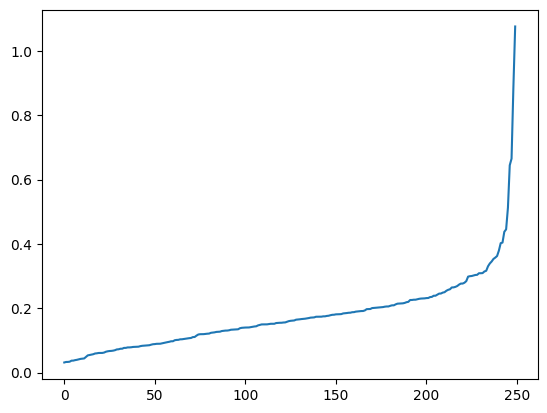

In [14]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4).fit(data3)
distances, _ = nn.kneighbors()
distances = np.sort(np.mean(distances, axis=1))

plt.plot(distances)
plt.show()

Оптимальный параметр эпсилон ~ 0.35

[-1  0  1  2]


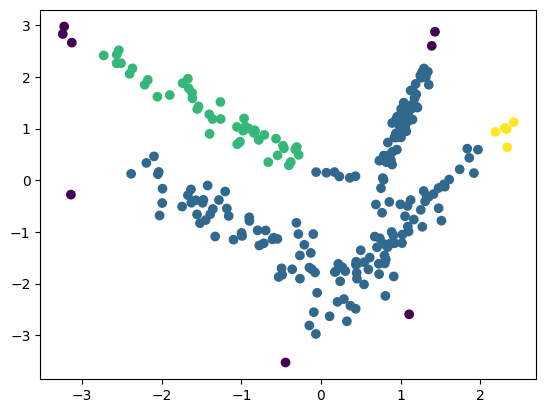

In [15]:
from sklearn.cluster import DBSCAN
d = DBSCAN(eps=0.35, min_samples=4).fit(data3)
print(np.unique(d.labels_))
plt.scatter(data3[:, 0], data3[:, 1], c=d.labels_)
plt.show()

Плоховато для 4-х классов. Попробую эпсилон поменьше.

[-1  0  1  2  3  4  5  6]


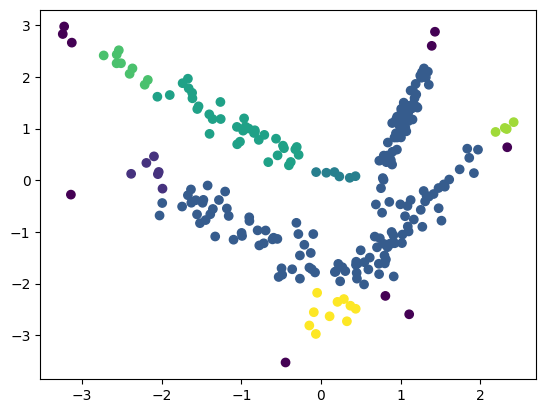

In [16]:
d2 = DBSCAN(eps=0.32, min_samples=4).fit(data3)
print(np.unique(d2.labels_))
plt.scatter(data3[:, 0], data3[:, 1], c=d2.labels_)
plt.show()

Лучше не стало, вероятно, классический алгоритм DBSCAN плохо подходит для этого датасета.
Посмотрим на метрики для 1-го варианта с эпсилон = 0.35, так как там получилось 4 кластера, как и требовалось.

In [17]:
print("Внутренние метрики")
print(calinski_harabasz_score(data3, d.labels_))
print(silhouette_score(data3, d.labels_))

print()

print("Внешние метрики")
print(rand_score(data3_y, d.labels_))
print(v_measure_score(data3_y, d.labels_))

Внутренние метрики
32.751973048829115
0.11378982881352588

Внешние метрики
0.5351646586345381
0.3466250674162053


Ситуация печальная, поэтому другие алгоритмы буду применять к этому же датасету.

### Gaussian Mixtures

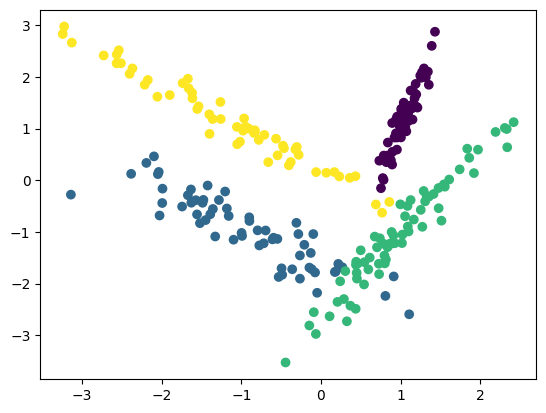

In [18]:
from sklearn.mixture import GaussianMixture
pred = GaussianMixture(n_components=4).fit(data3).predict(data3)
plt.scatter(data3[:, 0], data3[:, 1], c=pred)
plt.show()

In [19]:
print("Внутренние метрики")
print(calinski_harabasz_score(data3, pred))
print(silhouette_score(data3, pred))

print()

print("Внешние метрики")
print(rand_score(data3_y, pred))
print(v_measure_score(data3_y, pred))

Внутренние метрики
151.17351874698417
0.3607559084448858

Внешние метрики
0.9535100401606426
0.8584579859094931


Силуэт маловат, потому что кластеры расположены очень близко друг к другу. Но по внешним метрикам и визуализации видно, что модель справилась бесподобно, выше всех похвал! Кроме того, этот алгоритм хорошо справился бы со 2-ым датасетом, так как кластеры в нём овальной формы.

### Иерархическая кластеризация

Возьмём второй датасет, так как с ним не очень хорошо сработал алгоритм Affinity Propagation.

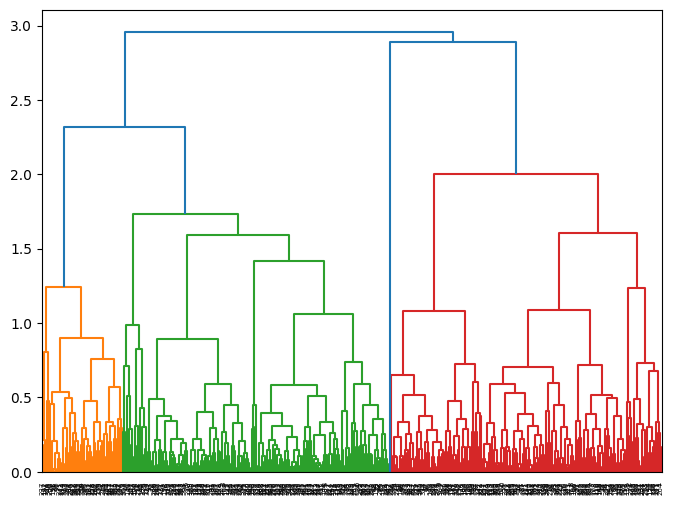

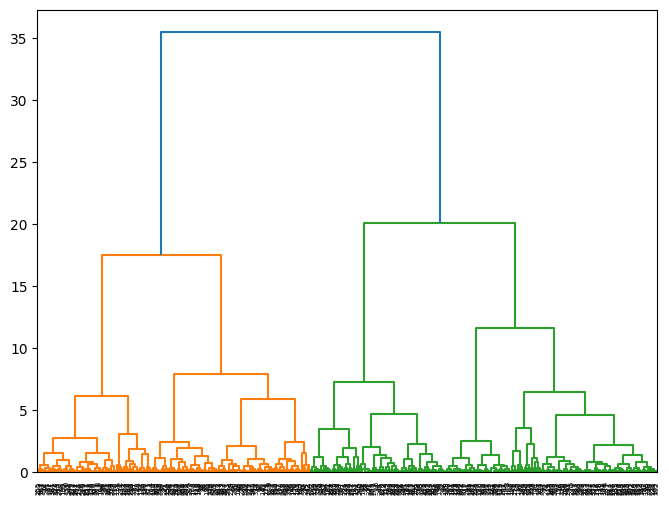

In [20]:
from scipy.cluster import hierarchy
h1 = hierarchy.linkage(data2, method="average")
h2 = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
hierarchy.dendrogram(h1)

plt.figure(figsize=(8, 6))
hierarchy.dendrogram(h2)
plt.show()

Метод подсчёта расстояния между точками average мне не нравится. Буду смотреть на ward. Судя по дереву, оптимальное кол-во кластеров для него = 4, но можно попробовать и 3, как в исходном датасете.

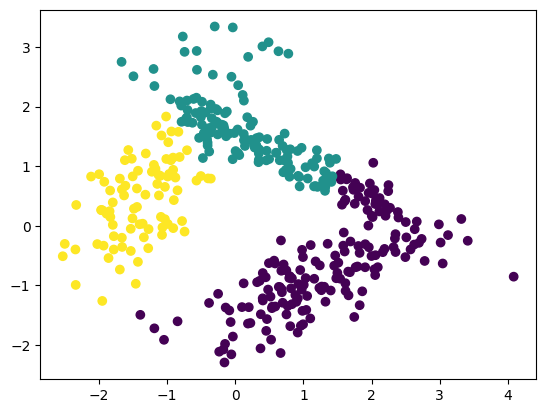

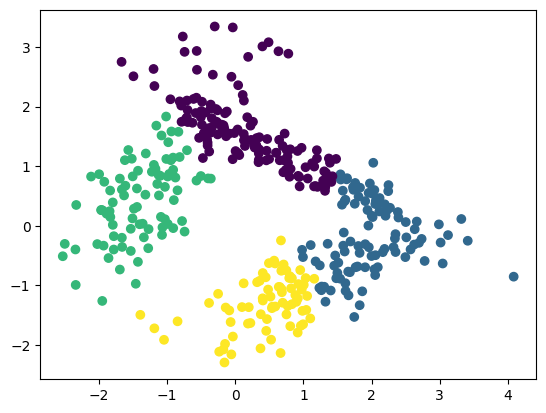

In [21]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3).fit(data2)
plt.scatter(data2[:, 0], data2[:, 1], c=ac.labels_)
plt.show()

ac2 = AgglomerativeClustering(n_clusters=4).fit(data2)
plt.scatter(data2[:, 0], data2[:, 1], c=ac2.labels_)

plt.show()

Первый вариант предпочтительнее, так как меньше смешивает точки из разных кластеров. Посмотрим метрики.

Первый случай.

In [22]:
print("Внутренние метрики")
print(calinski_harabasz_score(data2, ac.labels_))
print(silhouette_score(data2, ac.labels_))

print()

print("Внешние метрики")
print(rand_score(data2_y, ac.labels_))
print(v_measure_score(data2_y, ac.labels_))

Внутренние метрики
380.1897116798234
0.4379157498505365

Внешние метрики
0.7637092731829574
0.545984599037393


Второй случай.

In [23]:
print("Внутренние метрики")
print(calinski_harabasz_score(data2, ac2.labels_))
print(silhouette_score(data2, ac2.labels_))

print()

print("Внешние метрики")
print(rand_score(data2_y, ac2.labels_))
print(v_measure_score(data2_y, ac2.labels_))

Внутренние метрики
462.68904459014465
0.43638184340224745

Внешние метрики
0.7507518796992482
0.52998637638937


По метрикам так же второй вариант немного лучше, хоть и по дереву он не был оптимальным.

## KMeans руками

In [24]:
from numpy.typing import NDArray
from math import sqrt

def euclid(point1: NDArray, point2: NDArray) -> float:
    return sqrt(np.sum((point1 - point2) ** 2))

def get_centroid(cluster: NDArray) -> NDArray:
    number_of_points = cluster.shape[0]
    coordinates = []

    for j in range(cluster.shape[1]):  # можно транспонировать и итерироваться мапом по строкам
        coordinates.append(np.sum(cluster[:, j]) / number_of_points)

    return np.array(coordinates)

In [25]:
a = np.array(
    [
        [1, 2, 3],
        [2, 3, 4],
        [4, 5, 6]
    ]
)

print(get_centroid(a))

[2.33333333 3.33333333 4.33333333]


In [36]:
class Kmeans:
    def __init__(self, n_clusters: int, iter: int, data: NDArray) -> None:
        self._n_clusters = n_clusters
        self._iter = iter
        self._data = data
        self._centroids = np.random.rand(n_clusters, data.shape[1])  # (кол-во кластеров) х (кол-во признаков)
        self._clusters = []

        for _ in range(n_clusters):
            self._clusters.append([])


    def fit(self) -> None:
        for _ in range(self._iter):
            for point in self._data:  # считаем расстояния до каждого центроида и кидаем точку в нужный кластер
                distances = []
                for centroid in self._centroids:
                    distances.append(euclid(point, centroid))
                cluster_number = np.argmin(distances)
                self._clusters[cluster_number].append(point)

            for index, cluster in enumerate(self._clusters):  # пересчитываем центроиды
                centroid = get_centroid(np.array(cluster))
                self._centroids[index] = centroid
    

In [39]:
km = Kmeans(3, 100, data1)
km.fit()
km._centroids

array([[-1.01347849, -0.70563509],
       [-1.31026815,  1.27663954],
       [ 0.972822  , -1.06726552]])

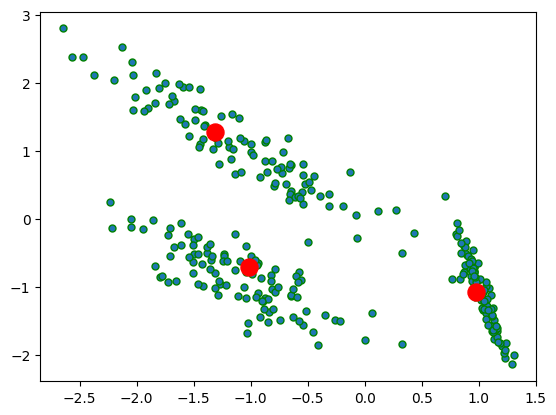

In [40]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="g")
plt.scatter(km._centroids[:, 0], km._centroids[:, 1], s=150, c="r")

УРААААААААААААААААААААААААААААААА

# Задание 2

### Подготовка

In [41]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"..\data\prepared_dfdiab.csv").drop("Unnamed: 0", axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Diabetes_012
0,0.0,0.0,1.0,0.096386,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.500000,1.0,1.000000,0.0
1,1.0,1.0,1.0,0.204819,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.166667,1.0,1.0,0.0,0.833333,0.2,0.428571,0.0
2,1.0,1.0,1.0,0.240964,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.916667,0.8,0.857143,0.0
3,0.0,1.0,1.0,0.144578,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,0.000000,0.0,0.0,1.0,0.750000,1.0,1.000000,0.0
4,1.0,0.0,1.0,0.168675,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,0.000000,0.0,0.0,1.0,0.666667,0.8,1.000000,0.0


In [42]:
temp = df.sample(200)
sample = temp.drop("Diabetes_012", axis=1)  # для визуализации
sample_y = temp["Diabetes_012"]

df_y = df["Diabetes_012"]
df = df.drop("Diabetes_012", axis=1)

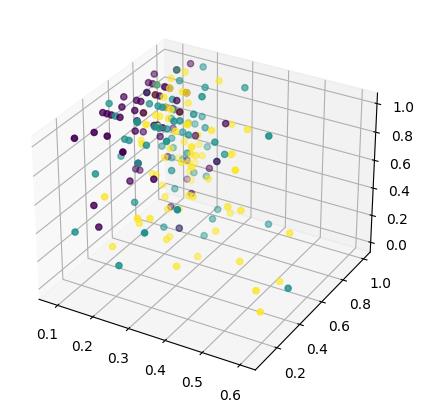

In [43]:
fit = plt.figure(figsize=[5, 5])
ax = plt.axes(projection="3d")
ax.scatter(sample["3"], sample["18"], sample["20"], c=sample_y)
plt.show()

Данные сильно накладываются друг на друга даже в 3D проекции, в кластеризации всё будет печально.

### KMeans

В датасете 3 класса, поэтому возьмём 3 кластера.

In [48]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init="k-means++", n_init="auto").fit(df)

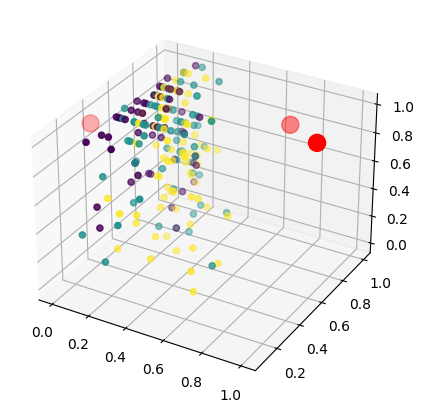

In [49]:
fit = plt.figure(figsize=[5, 5])
ax = plt.axes(projection="3d")
ax.scatter(sample["3"], sample["18"], sample["20"], c=sample_y)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c="red", s=150)
plt.show()

Не особо понятно, посмотрим в 2D

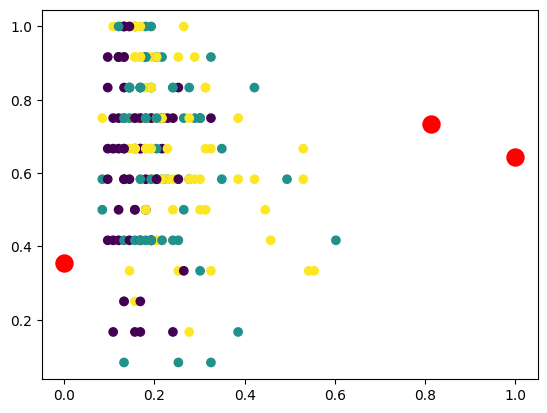

In [50]:
plt.scatter(sample["3"], sample["18"], c=sample_y)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c="red", s=150)
plt.show()

In [51]:
print("Внутренние метрики")
print(km.inertia_)
print(silhouette_score(df, km.labels_))

print()

print("Внешние метрики")
print(rand_score(df_y, km.labels_))
print(v_measure_score(df_y, km.labels_))

Внутренние метрики
29629.420189800043


0.10977513155281081

Внешние метрики
0.5837519050882678
0.06670588066091124


Кроме rand score всё очень грустно, а rand score - просто грустно. Визуализация тоже печальная.

### Иерархическая

In [52]:
ac = AgglomerativeClustering(n_clusters=3).fit(df)

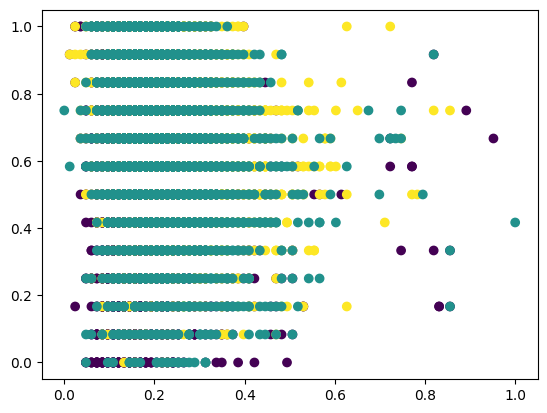

In [53]:
plt.scatter(df["3"], df["18"], c=df_y)
plt.show()

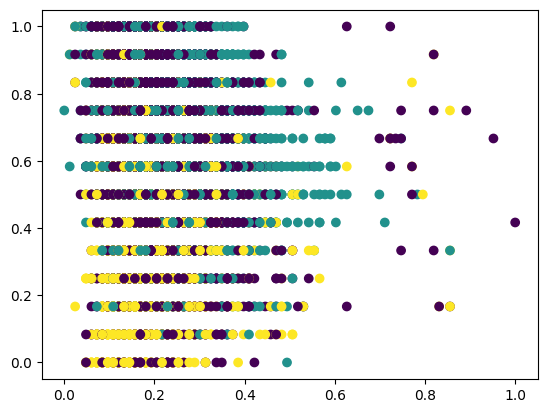

In [54]:
plt.scatter(df["3"], df["18"], c=ac.labels_)
plt.show()

In [55]:
print("Внутренние метрики")
print(calinski_harabasz_score(df, ac.labels_))
print(silhouette_score(df, ac.labels_))

print()

print("Внешние метрики")
print(rand_score(df_y, ac.labels_))
print(v_measure_score(df_y, ac.labels_))

Внутренние метрики
1124.9820554877263


0.05685733032279491

Внешние метрики
0.5555545469281087
0.04555602251070897


Лучше вообще не стало.

### DBSCAN

Возьмём кол-во соседей = 2 * размероность пространства = 2 * 21 = 42

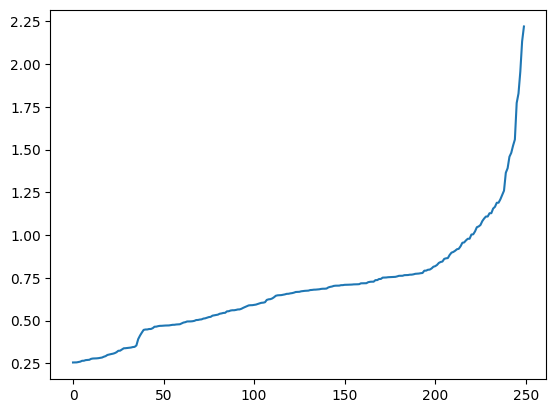

In [56]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=42).fit(data3)
distances, _ = nn.kneighbors()
distances = np.sort(np.mean(distances, axis=1))

plt.plot(distances)
plt.show()

eps = 1.25

In [57]:
dbscan = DBSCAN(eps=1.25, min_samples=42).fit(df)

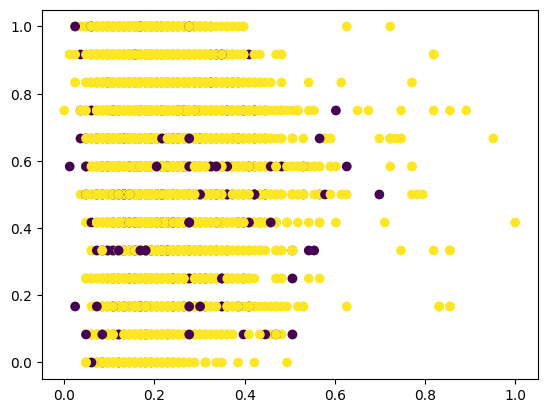

In [58]:
plt.scatter(df["3"], df["18"], c=dbscan.labels_)
plt.show()

In [59]:
print("Внутренние метрики")
print(calinski_harabasz_score(df, dbscan.labels_))
print(silhouette_score(df, dbscan.labels_))

print()

print("Внешние метрики")
print(rand_score(df_y, dbscan.labels_))
print(v_measure_score(df_y, dbscan.labels_))

Внутренние метрики
387.78078153428044


0.1765560898297331

Внешние метрики
0.37275746108492513
0.002993746524148839


Никаким алгоритмом адекватно кластеризовать не удалось. 